## Task 1 - Familiarization

In [78]:
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import rcParams
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('Solarize_Light2')
style.use('Solarize_Light2')
%matplotlib inline
print(plt.style.available)
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 60

['seaborn-notebook', 'seaborn-deep', 'tableau-colorblind10', 'seaborn-colorblind', 'dark_background', 'seaborn-dark', 'seaborn-paper', 'seaborn-muted', '_classic_test', 'seaborn-ticks', 'fast', 'seaborn-darkgrid', 'seaborn', 'seaborn-pastel', 'bmh', 'seaborn-whitegrid', 'seaborn-poster', 'Solarize_Light2', 'ggplot', 'fivethirtyeight', 'classic', 'seaborn-white', 'seaborn-bright', 'seaborn-talk', 'seaborn-dark-palette', 'grayscale']


In [2]:
df = pd.DataFrame(pd.read_csv('BATADAL_trainingset1.csv'))
pd.set_option('display.expand_frame_repr', False)
df.describe()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
count,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.0,8761.000000,...,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.000000,8761.0
mean,2.676905,3.285748,4.201820,3.568129,2.748205,5.370437,3.302672,100.926032,1.0,69.464357,...,79.411082,27.776600,82.737615,24.453808,74.459039,24.362250,67.921632,33.755911,29.453266,0.0
std,1.202940,1.468621,0.678465,0.539656,0.735162,0.177459,0.828849,10.048618,0.0,42.239742,...,8.461924,2.720291,7.502937,4.416089,9.974357,4.438203,5.321227,4.232716,2.658146,0.0
min,0.320112,0.293876,2.882847,2.002133,1.293241,4.824605,1.054194,85.495201,1.0,0.000000,...,65.059624,20.690191,54.757198,14.797167,58.325397,14.541955,51.697071,27.649677,22.370066,0.0
25%,1.650647,2.131776,3.623394,3.139640,2.123508,5.248147,2.631062,94.342598,1.0,0.000000,...,71.978676,26.674088,83.912292,20.516289,62.949253,20.409576,66.718307,30.668709,28.432796,0.0
50%,2.798855,3.498371,4.240439,3.574840,2.758198,5.500000,3.252838,96.729073,1.0,94.075195,...,75.879807,28.110842,85.219460,22.969397,81.176102,22.856150,68.807007,32.222023,29.834288,0.0
75%,3.754744,4.570782,4.793697,4.009889,3.372392,5.500000,3.986883,112.294952,1.0,96.614708,...,88.221329,29.553995,86.416519,28.457081,82.673698,28.382421,71.218712,38.134647,31.275637,0.0
max,4.871329,5.663802,5.433022,4.690665,4.162726,5.500000,4.999618,122.705627,1.0,100.140671,...,94.961258,33.763836,105.951820,36.325947,89.053986,36.325947,96.180450,45.388145,35.161724,0.0


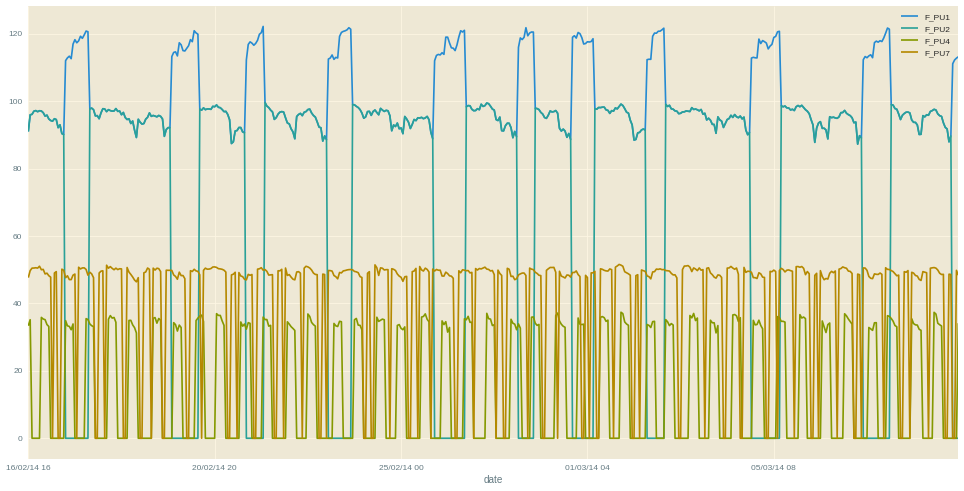

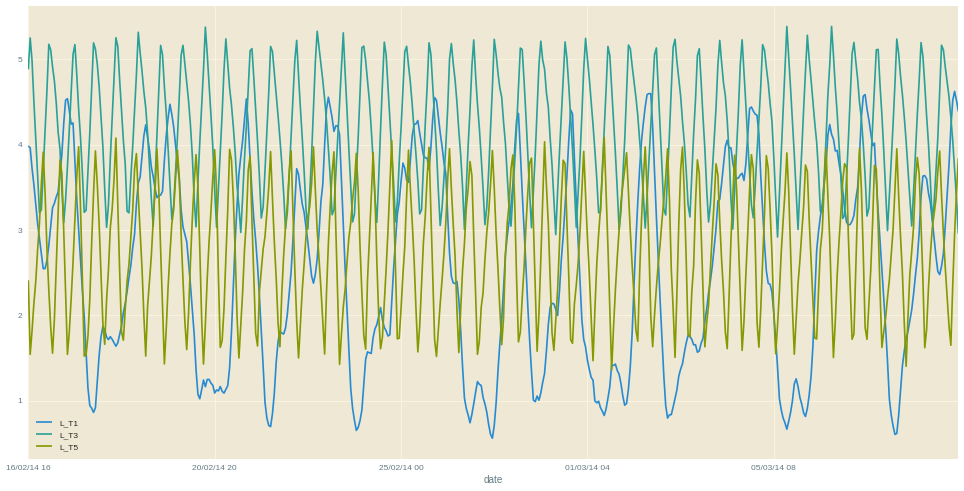

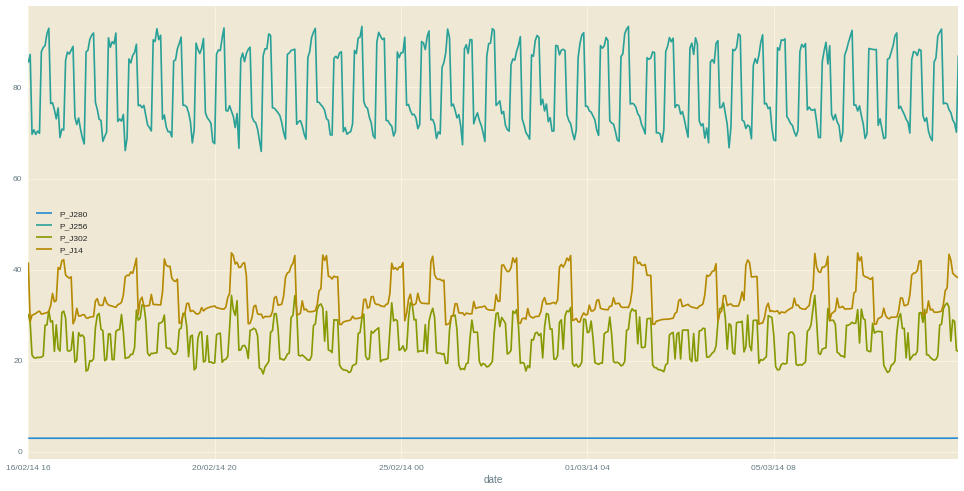

In [79]:
data_preproc = pd.DataFrame({
    'date': df["DATETIME"],
    'F_PU1': df["F_PU1"],
    'F_PU2': df["F_PU2"],
    'F_PU4': df["F_PU4"],
    'F_PU7': df["F_PU7"],
})[1000:1500]
data_preproc2 = pd.DataFrame({
    'date': df["DATETIME"],
    'L_T1': df["L_T1"],
    'L_T3': df["L_T3"],
    'L_T5': df["L_T5"],
})[1000:1500]
data_preproc3 = pd.DataFrame({
    'date': df["DATETIME"],
    'P_J280': df["P_J280"],
    'P_J256': df["P_J256"],
    'P_J302': df["P_J302"],
    'P_J14': df["P_J14"],
})[1000:1500]

data_preproc.plot(figsize=(20,10), x='date')
data_preproc2.plot(figsize=(20,10), x='date')
data_preproc3.plot(figsize=(20,10), x='date')


rcParams['figure.figsize'] = 12,10
sns.heatmap(df.corr())

values = df['F_PU1']
rolling_mean = values.rolling(window=20).mean()
rolling_mean2 = values.rolling(window=50).mean()
plt.plot(df['DATETIME'], values, label='AMD')
plt.plot(df['DATETIME'], rolling_mean, label='AMD 20 Day SMA', color='orange')
plt.plot(df['DATETIME'], rolling_mean2, label='AMD 50 Day SMA', color='magenta')
plt.legend(loc='upper left')
plt.show()

Test MSE: 34.441


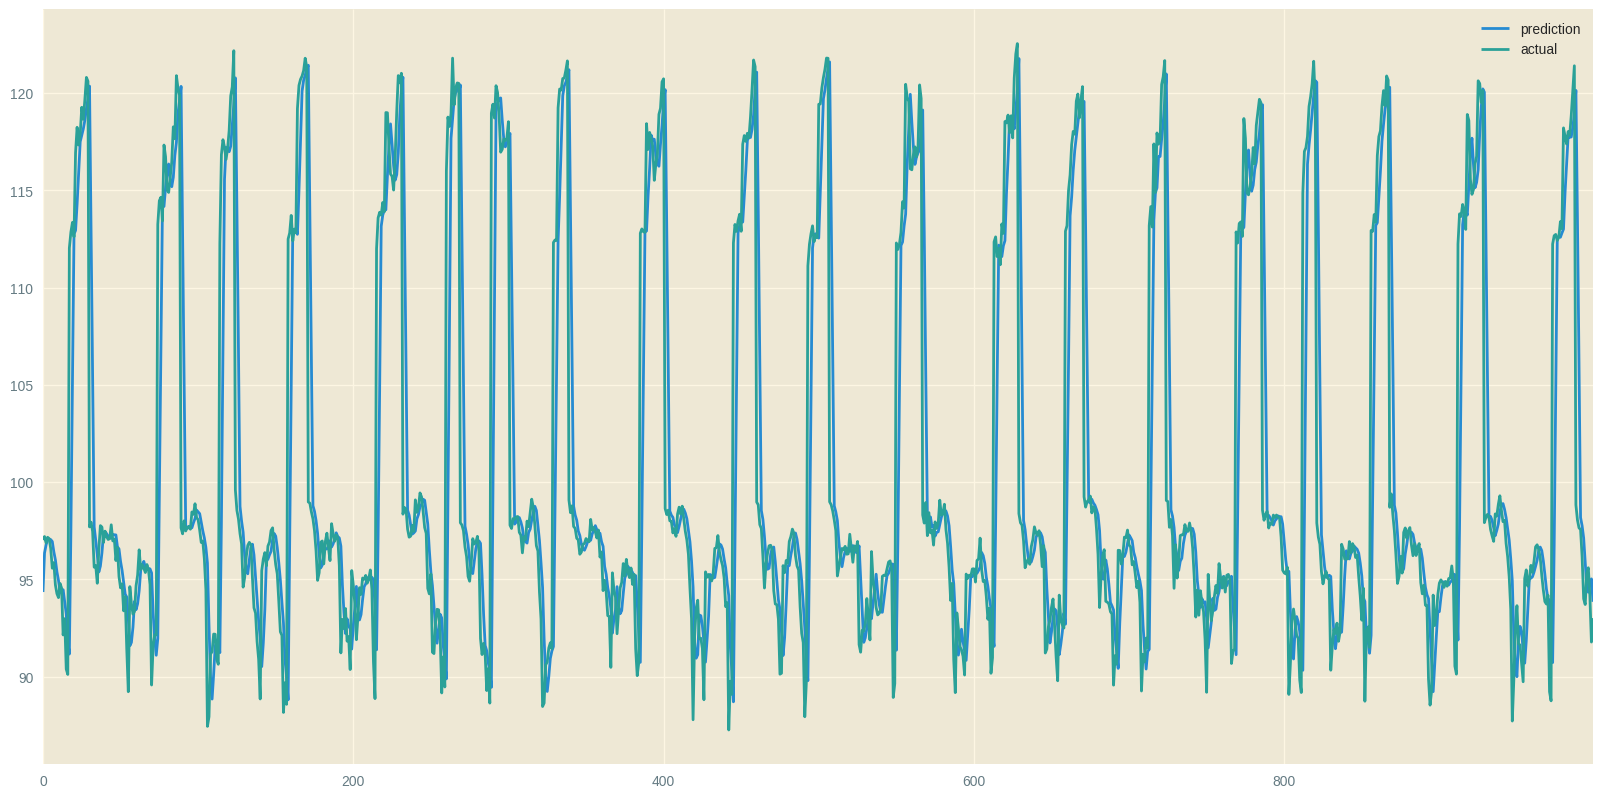

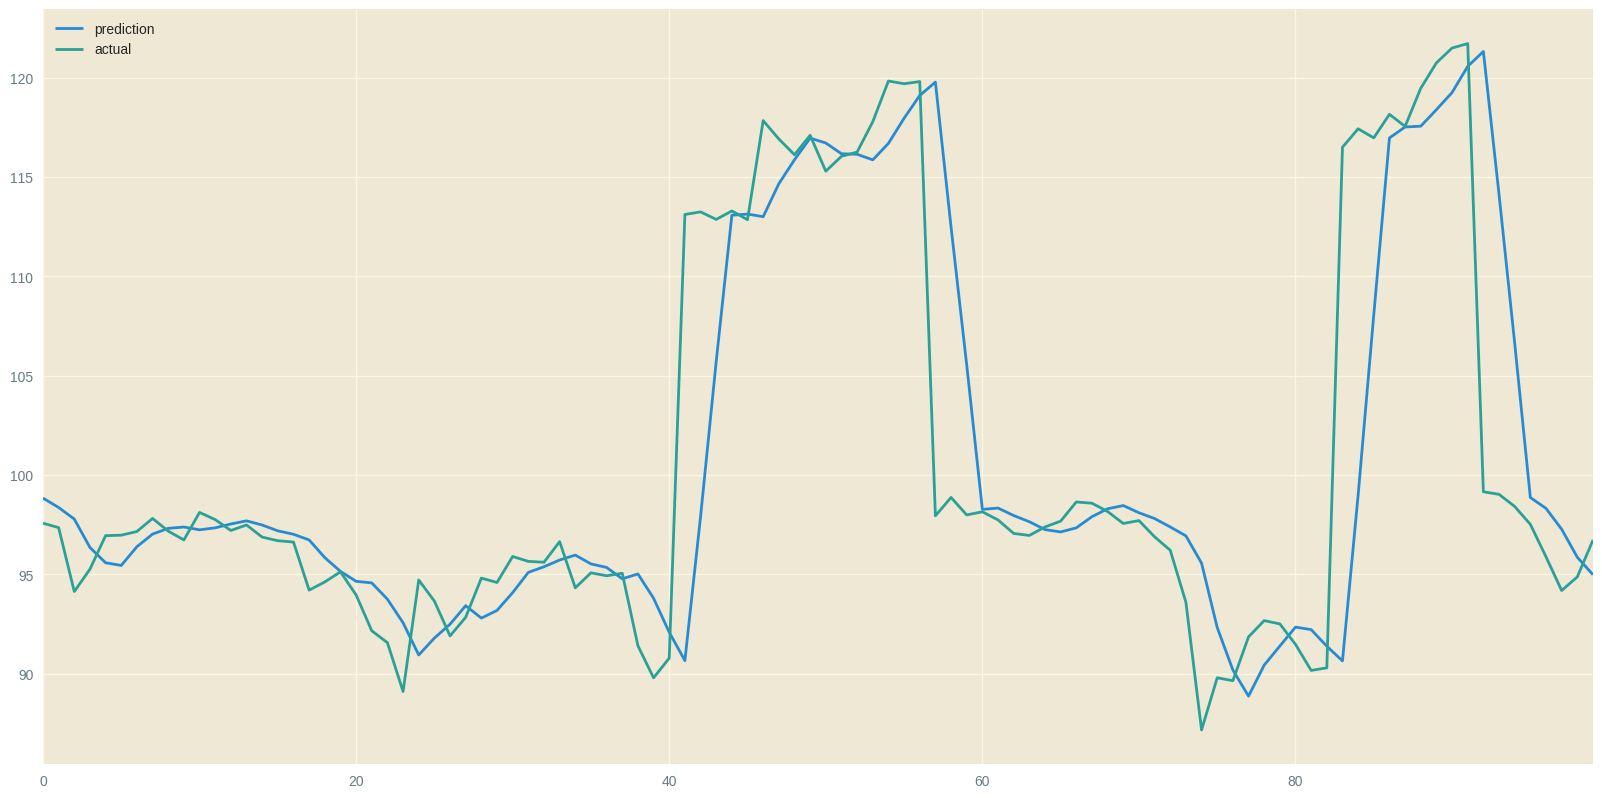

In [73]:
from numpy import mean
from sklearn.metrics import mean_squared_error

def moving_average_prediction(data, window = 3):
    test = [data[i] for i in range(window, len(data))]
    predictions = []
    
    current_prediction = window
    for t in range(len(test)):
        predicted_value = mean([data[i] for i in range(current_prediction-window,current_prediction)])
        predictions.append(predicted_value)
        current_prediction += 1
    # 	print('predicted=%f, expected=%f' % (yhat, obs))
    
    error = mean_squared_error(test, predictions)
    print('Test MSE: %.3f' % error)
    return test, predictions

data, predictions = moving_average_prediction(df['F_PU1'].values, 3)

# plots
pd.DataFrame({"prediction":predictions[1000:2000],
            "actual": data[1000:2000]}).plot(figsize=(20,10))
# zoom plot
pd.DataFrame({"prediction":predictions[:100],
            "actual": data[:100]}).plot(figsize=(20,10))

# Task 2 - ARMA

In [47]:
# ARMA
%pip install statsmodels scipy

Note: you may need to restart the kernel to use updated packages.


In [48]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

## Testing serial correlation with the Durbin-Watson statistic
The DW statistic will lie in the 0-4 range, with a value near two indicating no first-order serial correlation. Positive serial correlation is associated with DW values below 2 and negative serial correlation with DW values above 2.
The value of Durbin-Watson statistic is close to 2 if the errors are uncorrelated. 

The Durbin-Watson statistic here is 0.0022. That means that there is a strong evidence that the variable has high positive autocorrelation.

In [95]:
# Durbin-Watson statistic. 
sm.stats.durbin_watson(df['F_PU1'])
sensors_to_model = ['F_PU1']

0.0021897673826897527

## Autocorrelation function
We calculate the autocorrelation and partial autocorrelation functions to make an informed descision about what ARMA parameters to use.

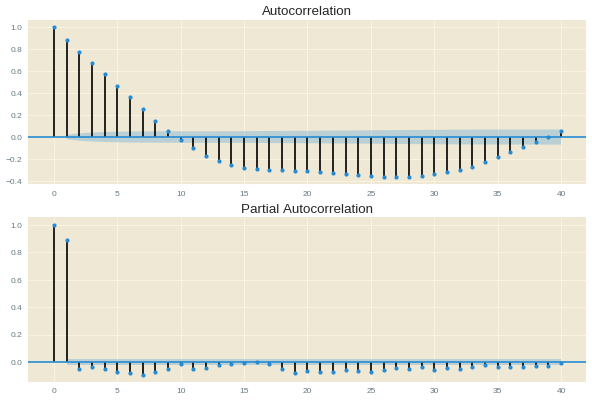

In [96]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['F_PU1'].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['F_PU1'], lags=40, ax=ax2)

To determine the ARMA parameters we use the following rules of thumb:
- Rule 1: If the ACF shows exponential decay, the PACF has a spike at lag 1, and no correlation for other lags, then use one autoregressive (p)parameter
- Rule 2: If the ACF shows a sine-wave shape pattern or a set of exponential decays, the PACF has spikes at lags 1 and 2, and no correlation for other lags, the use two autoregressive (p) parameters
- Rule 3: If the ACF has a spike at lag 1, no correlation for other lags, and the PACF damps out exponentially, then use one moving average (q) parameter.
- Rule 4: If the ACF has spikes at lags 1 and 2, no correlation for other lags, and the PACF has a sine-wave shape pattern or a set of exponential decays, then use two moving average (q) parameter.
- Rule 5: If the ACF shows exponential decay starting at lag 1, and the PACF shows exponential decay starting at lag 1, then use one autoregressive (p) and one moving average (q) parameter.

Looking at the graphs above, we conclude that rule 2 seems to apply best to out data. Thus, we will use 2 autoregressive and no moving average parameters.

In [110]:
arma_mod20 = sm.tsa.ARMA(df['F_PU1'], (2,0)).fit()
print(arma_mod20.params)

# Akaike Information Criterion (AIC), 
# Schwarz Bayesian Information Criterion (BIC), and 
# Hannan-Quinn Information Criterion (HQIC). Our goalis to choose a model that minimizes 
# (AIC, BIC, HQIC).
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)


# The Durbin-Watson statistic is now very close to 2
print(sm.stats.durbin_watson(arma_mod20.resid.values))

#The equations are somewhat simpler if the time series is first reduced to zero-mean by subtracting the sample mean. Therefore, we will work with the mean-adjusted series

const          100.920579
ar.L1.F_PU1      0.936258
ar.L2.F_PU1     -0.053913
dtype: float64
51631.68720326322 51659.999464593886 51641.334092069796
2.0032789456669433


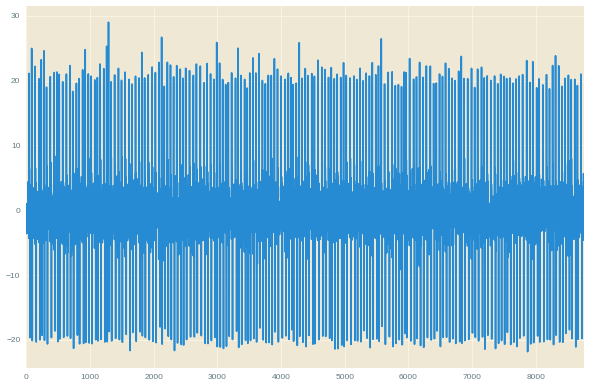

In [92]:
# Plotting the residuals
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
resid20 = arma_mod20.resid
ax = resid.plot(ax=ax);

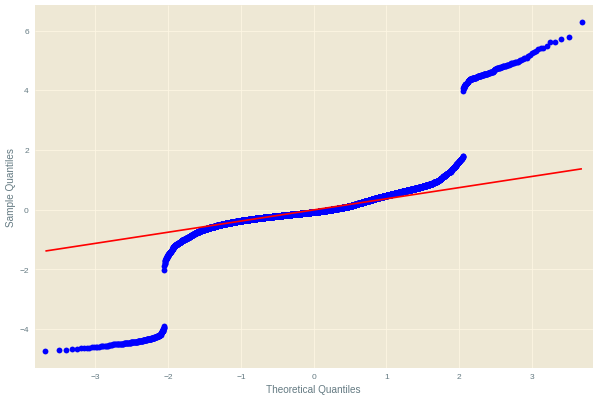

In [93]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111)
fig = qqplot(resid20, line='q', ax=ax, fit=True)

In [111]:
stats.normaltest(resid20)


NormaltestResult(statistic=1992.7944582118116, pvalue=0.0)

## ARMA Model Autocorrelation

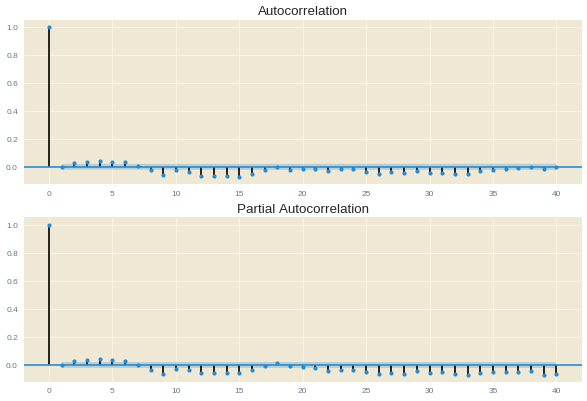

In [112]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid20.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid20, lags=40, ax=ax2)

## Prediction

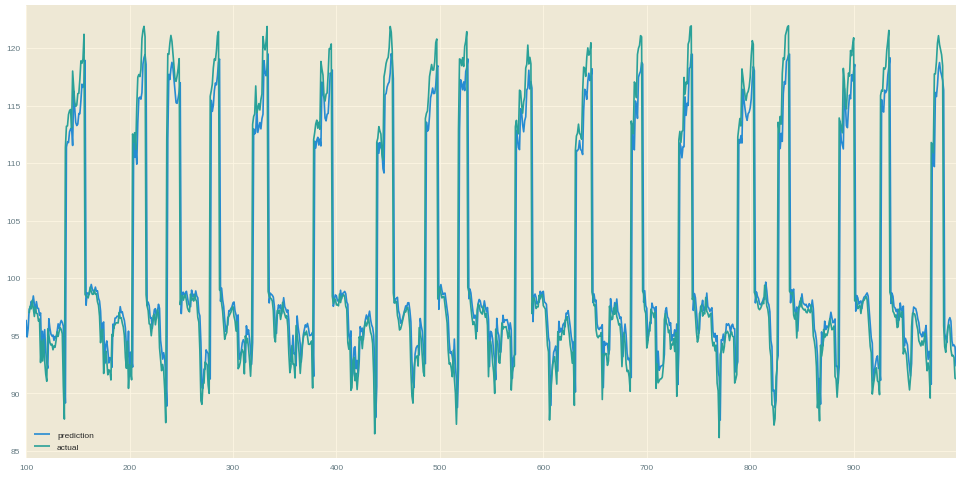

In [132]:
prediction = arma_mod20.predict()
pd.DataFrame({"prediction":prediction[100:1000],
            "actual": df['F_PU1'][103:1000]}).plot(figsize=(20,10))

In [123]:
def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat)) # or percent error = * 100

def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()


In [143]:


print("MFE = ", mean_forecast_err(df['F_PU1'], prediction))
print("MAE = ", mean_absolute_err(df['F_PU1'], prediction))
print("MSE = ", mean_squared_error(df['F_PU1'], prediction))


MFE =  0.00016943601352954833
MAE =  1.691063364769438e-06
MSE =  21.208511823402922
8758 8761
